<a href="https://colab.research.google.com/github/huynhspm/ML-DL/blob/main/Number%20Classification/Mnist_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Number Classification Project**

In [4]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import time

In [2]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_width = 28
img_height = 28
img_channel = 1

label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


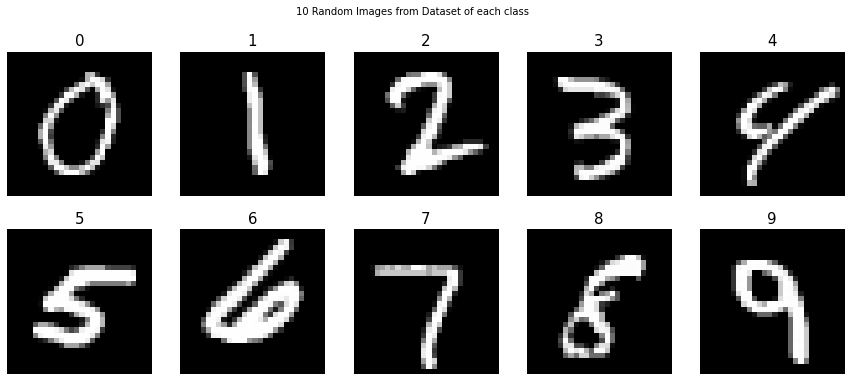

In [3]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx] not in d.keys():
          d[y_train[idx]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]], cmap = 'gray')
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 10)
plt.show()

# **Classify with k_nearest_neighbors**

In [ ]:
# 1. prepare data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

print(X_train.shape)

(60000, 784)


In [ ]:
# 2. build model
model_KNN = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)

In [ ]:
# 3. train model
start_time = time.time()
model_KNN.fit(X_train, y_train)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Running time: 0.01 (s)


In [ ]:
# 4. Đánh giá model với testset
start_time = time.time()
KNN_pred = model_KNN.predict(X_test)
print('KNeighborsClassifier: %d' %(100 * accuracy_score(y_test, KNN_pred)))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

KNeighborsClassifier: 96
Running time: 28.93 (s)


# **Classify with support vector machine**

In [ ]:
# 1. prepare data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

print(X_train.shape)

(60000, 784)


In [ ]:
# 2. build model
model_SVM = SVC(kernel='poly', gamma=1, coef0 = 1)

In [ ]:
# 3. train model
start_time = time.time()
model_SVM.fit(X_train, y_train)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Running time: 162.04 (s)


In [ ]:
# 4. Đánh giá model với testset
start_time = time.time()
SVM_pred = model_SVM.predict(X_test)
print('KNeighborsClassifier: %d' %(100 * accuracy_score(y_test, SVM_pred)))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

KNeighborsClassifier: 97
Running time: 33.40 (s)


# **Classify with neural network**

In [ ]:
# 1. data augmentation
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

aug_train = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=30, width_shift_range=0.1, 
                               height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, fill_mode='nearest')
aug_test= ImageDataGenerator(rescale=1./255)

train_generator = aug_train.flow(X_train, y_train, batch_size=32, subset='training')
val_generator = aug_train.flow(X_train, y_train, batch_size=32, subset='validation')
test_generator = aug_test.flow(X_test, y_test, batch_size=32)

In [ ]:
# 2. build model
model_NN = Sequential()
model_NN.add(Flatten(input_shape=(img_width, img_height, img_channel)))
model_NN.add(Dense(128, activation="relu"))
model_NN.add(Dense(10, activation="softmax"))

model_NN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3. train model
start_time = time.time()

numOfEpoch = 20
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2,
                                            verbose = 1, factor = 0.5, min_lr = 0.00001)

H_NN = model_NN.fit(train_generator, epochs = numOfEpoch, validation_data = val_generator, 
               verbose=1, callbacks=[earlystop,learning_rate_reduction])

end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3465 - accuracy: 0.8953 - val_loss: 0.3090 - val_accuracy: 0.9105 - lr: 0.0010
Epoch 2/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3068 - accuracy: 0.9101 - val_loss: 0.2868 - val_accuracy: 0.9143 - lr: 0.0010
Epoch 3/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2779 - accuracy: 0.9185 - val_loss: 0.2680 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2646 - accuracy: 0.9207 - val_loss: 0.2779 - val_accuracy: 0.9187 - lr: 0.0010
Epoch 5/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2506 - accuracy: 0.9251 - val_loss: 0.2426 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 6/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2433 - accuracy: 0.9272 - val_loss: 0.2302 - val_accuracy: 0.9309 - lr: 0.0010
Epoch 7/20
1500/1500 [========================

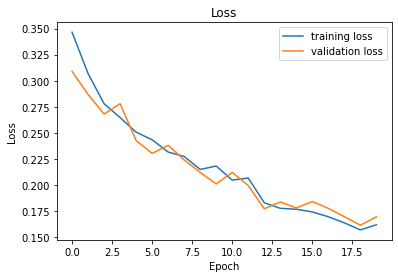

In [ ]:
# 4. Vẽ đồ thị loss của traning set và validation set
plt.plot(np.arange(0, len(H_NN.epoch)), H_NN.history['loss'], label='training loss')
plt.plot(np.arange(0, len(H_NN.epoch)), H_NN.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

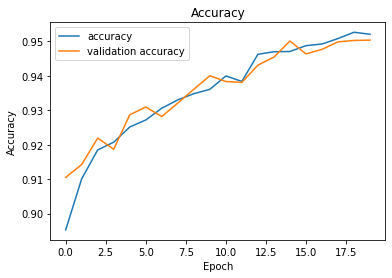

In [ ]:
# 5. Vẽ đồ thị accuracy của traning set và validation set
plt.plot(np.arange(0, len(H_NN.epoch)), H_NN.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, len(H_NN.epoch)), H_NN.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# 6. Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]', model_NN.evaluate(test_generator, verbose = 0))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

[loss, accuracy] [0.0645429939031601, 0.980400025844574]
Running time: 0.75 (s)


# **Classify with convolutional neural network**

In [20]:
# 1. data augmentation
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

aug_train = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=30, width_shift_range=0.1, 
                               height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, fill_mode='nearest')
aug_test= ImageDataGenerator(rescale=1./255)

train_generator = aug_train.flow(X_train, y_train, batch_size=32, subset='training')
val_generator = aug_train.flow(X_train, y_train, batch_size=32, subset='validation')
test_generator = aug_test.flow(X_test, y_test, batch_size=32)

In [24]:
# 2. build model
model_CNN = Sequential()
 
model_CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_channel)))
model_CNN.add(Conv2D(32, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))

model_CNN.add(Flatten())

model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dense(10, activation='softmax'))

model_CNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [25]:
# 3. train model
start_time = time.time()

numOfEpoch = 30
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2,
                                            verbose = 1, factor = 0.5, min_lr = 0.00001)
model_checkpoint = ModelCheckpoint(filepath='../model.h5', 
                                   monitor='val_acc', mode='max', save_best_only=True)

H_CNN = model_CNN.fit(train_generator, epochs = numOfEpoch, validation_data = val_generator, 
               verbose=1, callbacks=[earlystop,learning_rate_reduction, model_checkpoint])

end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/30
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3673 - accuracy: 0.8823 - val_loss: 0.1735 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 2/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1393 - accuracy: 0.9571 - val_loss: 0.1469 - val_accuracy: 0.9548 - lr: 0.0010
Epoch 3/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1090 - accuracy: 0.9668 - val_loss: 0.1116 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 4/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0914 - accuracy: 0.9720 - val_loss: 0.0974 - val_accuracy: 0.9705 - lr: 0.0010
Epoch 5/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0829 - accuracy: 0.9741 - val_loss: 0.0933 - val_accuracy: 0.9701 - lr: 0.0010
Epoch 6/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0746 - accuracy: 0.9772 - val_loss: 0.0849 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 7/30
1500/1500 [========================

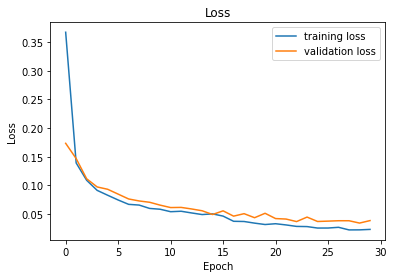

In [26]:
# 4. Vẽ đồ thị loss của traning set và validation set
plt.plot(np.arange(0, len(H_CNN.epoch)), H_CNN.history['loss'], label='training loss')
plt.plot(np.arange(0, len(H_CNN.epoch)), H_CNN.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

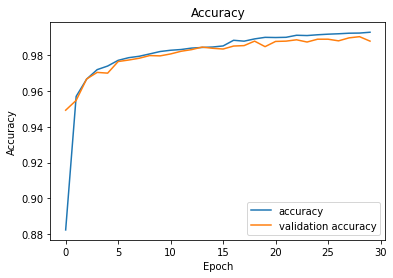

In [27]:
# 5. Vẽ đồ thị accuracy của traning set và validation set
plt.plot(np.arange(0, len(H_CNN.epoch)), H_CNN.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, len(H_CNN.epoch)), H_CNN.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [28]:
# 6. Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]', model_CNN.evaluate(test_generator, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.9936
[loss, accuracy] [0.020706193521618843, 0.9936000108718872]
Running time: 1.31 (s)


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Giá trị dự đoán:  7


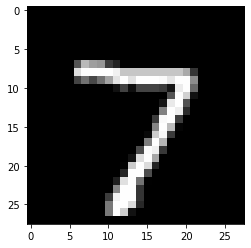

In [13]:
# 7. predict
plt.imshow(X_test[0].reshape(img_width, img_height), cmap='gray')

y_predict = model_CNN.predict(X_test[0].reshape(1,img_width, img_height, img_channel))
print(y_predict)
print('Giá trị dự đoán: ', np.argmax(y_predict))

In [ ]:
# 8. load ảnh
from google.colab import files
uploaded = files.upload()

Saving 2.jpg to 2.jpg


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
9


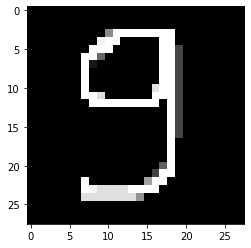

In [ ]:
# 9. predict ảnh tự vẽ 
import cv2
img = cv2.imread('9.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(src=img, dsize=(img_width, img_height))
plt.imshow(img, cmap='gray')

y_pred = model_CNN.predict(img.reshape(1, img_width, img_height, img_channel))
print(y_pred)
print(np.argmax(y_pred))

In [29]:
# 10. save model
model_CNN.save('Mnist_model.h5')